<a href="https://colab.research.google.com/github/ahmed-kamal91/senu2/blob/main/Senu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import gdown

# Shared link
url = 'https://drive.google.com/uc?id=1uksSfGbDFKYmDLFtB7OGa88Zf9FwFd3A'

# Output file
output = '/content/total_seg.zip'

# Download the file
gdown.download(url, output, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1uksSfGbDFKYmDLFtB7OGa88Zf9FwFd3A
From (redirected): https://drive.google.com/uc?id=1uksSfGbDFKYmDLFtB7OGa88Zf9FwFd3A&confirm=t&uuid=8ab31ae1-0d13-4649-a771-7421457fcc22
To: /content/total_seg.zip
100%|██████████| 7.67G/7.67G [00:54<00:00, 140MB/s]


'/content/total_seg.zip'

In [5]:
!unzip /content/total_seg.zip -d /content/

Streaming output truncated to the last 5000 lines.
  inflating: /content/my-total-segmentator/46680/24657/spleen.nii.gz  
  inflating: /content/my-total-segmentator/46680/24657/stomach.nii.gz  
   creating: /content/my-total-segmentator/46680/58148/
  inflating: /content/my-total-segmentator/46680/58148/fuse.nii.gz  
  inflating: /content/my-total-segmentator/46680/58148/colon.nii.gz  
  inflating: /content/my-total-segmentator/46680/58148/duodenum.nii.gz  
  inflating: /content/my-total-segmentator/46680/58148/esophagus.nii.gz  
  inflating: /content/my-total-segmentator/46680/58148/kidney_left.nii.gz  
  inflating: /content/my-total-segmentator/46680/58148/kidney_right.nii.gz  
  inflating: /content/my-total-segmentator/46680/58148/liver.nii.gz  
  inflating: /content/my-total-segmentator/46680/58148/small_bowel.nii.gz  
  inflating: /content/my-total-segmentator/46680/58148/spleen.nii.gz  
  inflating: /content/my-total-segmentator/46680/58148/stomach.nii.gz  
   creating: /content/

# exploring masks:

In [6]:
pip install monai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 13.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylin

In [8]:
from monai.transforms import LoadImage

# Define the path to your NIfTI file
ct_folder = '/content/my-total-segmentator/10004/21057/liver.nii.gz'

# Create a LoadImage transform instance
loader = LoadImage(image_only=True)

# Use the loader to load the NIfTI file
image_data = loader(ct_folder)

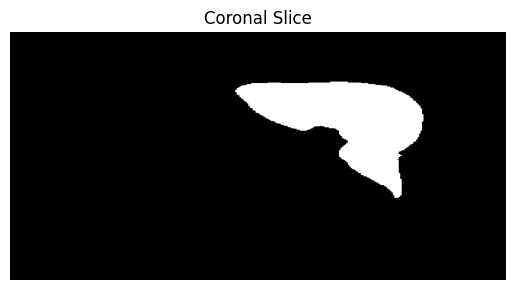

In [12]:
import matplotlib.pyplot as plt

# Assuming you've already loaded the image_data using MONAI

# Select the coronal slice index you want to visualize
coronal_slice_index = image_data.shape[1] // 2  # For example, choosing the middle slice

# Plot the coronal slice
plt.imshow(image_data[:, coronal_slice_index+20, :], cmap='gray')
plt.title('Coronal Slice')
plt.axis('off')
plt.show()


In [17]:
def load_ct(filepath, downsample_rate=1):
    img = nib.load(filepath).get_fdata()
    img = np.transpose(img, [1, 0, 2])
    img = np.rot90(img, 1, (1,2))
    img = img[::-1,:,:]
    img = np.transpose(img, [1, 0, 2])
    img = img[::downsample_rate, ::downsample_rate, ::downsample_rate]
    return img

In [19]:
the_mask = load_ct('/content/my-total-segmentator/10004/21057/liver.nii.gz')

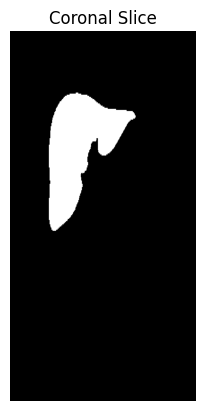

In [39]:
import matplotlib.pyplot as plt


coronal_slice_index = the_mask.shape[1] // 2  # For example, choosing the middle slice

# Plot the coronal slice
plt.imshow(the_mask[:, coronal_slice_index-30, :], cmap='gray')
plt.title('Coronal Slice')
plt.axis('off')
plt.show()


In [45]:
!pip install mmengine

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 451.7/451.7 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.7/254.7 kB 6.7 MB/s eta 0:00:00


In [55]:
!python /content/preprocess/combine_masks.py

patient id :  29876
scan id :  27172
Combined nii saved to: /content/combined_masks/29876_27172.nii.gz
patient id :  54190
scan id :  32893
Combined nii saved to: /content/combined_masks/54190_32893.nii.gz
patient id :  54190
scan id :  59346
Combined nii saved to: /content/combined_masks/54190_59346.nii.gz
patient id :  59889
scan id :  26590
Combined nii saved to: /content/combined_masks/59889_26590.nii.gz
patient id :  59889
scan id :  55681
Combined nii saved to: /content/combined_masks/59889_55681.nii.gz
patient id :  20791
scan id :  19070
Combined nii saved to: /content/combined_masks/20791_19070.nii.gz
patient id :  2112
scan id :  27280
Combined nii saved to: /content/combined_masks/2112_27280.nii.gz
patient id :  23170
scan id :  33591
Combined nii saved to: /content/combined_masks/23170_33591.nii.gz
patient id :  23170
scan id :  49863
Combined nii saved to: /content/combined_masks/23170_49863.nii.gz
patient id :  17185
scan id :  48568
^C


In [56]:
cd /content/my-total-segmentator/17185/48568

/content/my-total-segmentator/17185/48568


In [57]:
os.listdir()

['duodenum.nii.gz',
 'colon.nii.gz',
 'kidney_left.nii.gz',
 'esophagus.nii.gz',
 'kidney_right.nii.gz',
 'liver.nii.gz',
 'stomach.nii.gz',
 'small_bowel.nii.gz',
 'fuse.nii.gz',
 'spleen.nii.gz']

In [ ]:
import os
import nibabel as nib
import numpy as np
from mmengine.config import Config
#----------------------------------

def combine_single_scan(scan_path, out_path, p_id, s_id):
  '''
  out_path: output where put combined nifti file
  p_id: patient id
  s_id: scan_id
  '''

  # Get list of NIfTI files in the folder---------
  nii_files = [f for f in os.listdir(scan_path)]
  # Initialize container
  container = None

  # Iterate over nii files----------------------
  for nii in nii_files:
      file_path = os.path.join(scan_path, nii)
      data = nib.load(file_path).get_fdata()
      #using OR element
      container = data if container is None else np.logical_or(container, data)

  container = container.astype(np.uint8)
  # Create combined new nii file-----------------------
  combined_img = nib.Nifti1Image(container, affine=None)
  combined_file_path = os.path.join(out_path, f'{p_id}_{s_id}.nii.gz')
  nib.save(combined_img, combined_file_path)

  print(f"Combined nii saved to: {combined_file_path}")

if __name__ == "__main__":

  cfg = Config.fromfile('/content/settings.py')
  nii_Masks_path = cfg.niiMasks_pth
  combined_niiMasks_pth = cfg.combinedNiiMasks_pth

    # Iterate over patient directories
  for p_id in os.listdir(nii_Masks_path):
    p_path = os.path.join(nii_Masks_path, p_id)
    for s_id in os.listdir(p_path):
      s_path = os.path.join(p_path, s_id)
      # Combine masks for the current scan
      print("patient id : ", p_id)
      print("scan id : ", s_id)
      combine_single_scan(s_path, combined_niiMasks_pth, p_id, s_id)













patient id :  29876
scan id :  27172
Combined nii saved to: /content/combined_masks/29876_27172.nii.gz
patient id :  54190
scan id :  32893
Combined nii saved to: /content/combined_masks/54190_32893.nii.gz
patient id :  54190
scan id :  59346
Combined nii saved to: /content/combined_masks/54190_59346.nii.gz
patient id :  59889
scan id :  26590
Combined nii saved to: /content/combined_masks/59889_26590.nii.gz
patient id :  59889
scan id :  55681
Combined nii saved to: /content/combined_masks/59889_55681.nii.gz
patient id :  20791
scan id :  19070
Combined nii saved to: /content/combined_masks/20791_19070.nii.gz
patient id :  2112
scan id :  27280
Combined nii saved to: /content/combined_masks/2112_27280.nii.gz
patient id :  23170
scan id :  33591
Combined nii saved to: /content/combined_masks/23170_33591.nii.gz
patient id :  23170
scan id :  49863
Combined nii saved to: /content/combined_masks/23170_49863.nii.gz
patient id :  17185
scan id :  48568
